 <h1 style='color:purple' align='center'>Data Science Project: SMS Spam Collection </h1>

Import Necessary Libraries

In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to C:\Users\Pc
[nltk_data]     world\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pc
[nltk_data]     world\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pc
[nltk_data]     world\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#Load the Data
sms_data = pd.read_csv('spam.csv', encoding='Latin-1')

#Display first 5 rows of the df
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#shape of the data
sms_data.shape

(5572, 5)

In [4]:
#size of the data
sms_data.size

27860

In [5]:
#info of the data
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#check for null values
sms_data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#check for duplicates
sms_data.duplicated().sum()

403

### Data Issues:
1. Duplicates: There are 403 duplicate entries in the dataset.

2. Unnamed Columns: There are 3 unnamed columns.

3. Column Names: The column names must be label and text

In [8]:
#create a copy of the original data
df = sms_data.copy()

In [9]:
#remove unnamed columns
df = df.drop(df.columns[-3:],axis=1 )

In [10]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [11]:
#rename columns
df.columns = ['label','text']

In [12]:
#Encode label
df['label']=df['label'].map({'ham':0,'spam':1})

### Exploratory Data Analysis (EDA)


In [13]:
class_counts = df['label'].value_counts()
class_counts

label
0    4516
1     653
Name: count, dtype: int64

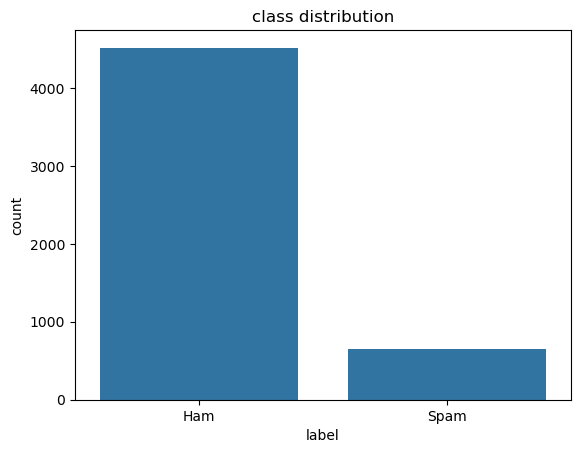

In [14]:
sns.countplot(data=df, x='label')
plt.title('class distribution')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

In [15]:
#Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stop words and lemmatize
    return ' '.join(tokens)

df['cleaned_message'] = df['text'].apply(preprocess_text)


print(df[['text', 'cleaned_message']].head())

                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  


In [16]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3000)

X = tfidf_vectorizer.fit_transform(df['cleaned_message']).toarray()

# Target variable
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=10, max_depth=None),  # Set default hyperparameters
    'SVM': SVC(kernel='linear', C=0.1, gamma=1),  # Set default hyperparameters
    'MultinomialNB': MultinomialNB()
}

In [21]:

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Performance:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n')

Logistic Regression Performance:
Accuracy: 0.9465
Precision: 0.9477
Recall: 0.6591
F1 Score: 0.7775
Confusion Matrix:
[[1323    8]
 [  75  145]]

Random Forest Performance:
Accuracy: 0.9678
Precision: 0.9670
Recall: 0.8000
F1 Score: 0.8756
Confusion Matrix:
[[1325    6]
 [  44  176]]

SVM Performance:
Accuracy: 0.9007
Precision: 0.9853
Recall: 0.3045
F1 Score: 0.4653
Confusion Matrix:
[[1330    1]
 [ 153   67]]

MultinomialNB Performance:
Accuracy: 0.9716
Precision: 0.9944
Recall: 0.8045
F1 Score: 0.8894
Confusion Matrix:
[[1330    1]
 [  43  177]]

